<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture #19

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import numpy.matlib as ml

## In our last episode

* Gaussian quadrature
  * Choice of $\{x_i\}$ and $\{w_i\}$ depends on order of $f(x)$ and properties of various orthogonal polynomials
    * $W(x)=1 \longrightarrow $ Legendre 
    * $W(x) = e^{-x} \longrightarrow $ Laguerre
    * $W(x)=e^{-x^2} \longrightarrow $ Hermite
    * $W(x)= 1/\sqrt{1-x^2} \longrightarrow $ Chebyshev
    * properties = roots and recursion relations
  * Gauss-Legendre quadrature for $\int_a^b f(x) dx$

## Gaussian quadrature

### Gauss-Laguerre Quadrature

Boundaries: $[a,b] = [0, +\infty[$

Recurrence relationship:
$$ (n+1) L_{n+1}(x) = (2n + 1 - x) L_n(x) - n L_{n-1}(x) $$

Derivative expression:
$$ x L'_n(x) = n \big[ L_n(x) - L_{n-1}(x) \big] $$

Weights:
$$ w_i = \frac{1}{x_i \big[L'_{n+1}(x_i)\big]^2} $$



In [0]:
def laguerre(x, m):
  '''
  returns Laguerre polynomial and its derivative of order m at points x
  '''
  p0 = np.ones_like(x) # P_{n-1}
  p1 = np.ones_like(x) - x   # P_{n}
  if m == 0: p = p0
  if m == 1: p = p1
  for k in range(1,m):
    p = (((2*k + 1)*np.ones_like(x) - x)*p1 - k*p0) / (k+1)
    p0 = p1
    p1 = p
  dp = m*(p1 - p0) / x
  return p, dp

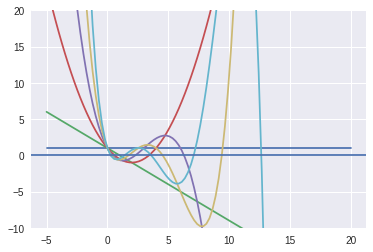

In [0]:
x = np.linspace(-5, 20, 100)
plt.plot(x,laguerre(x,0)[0],x,laguerre(x,1)[0],x,laguerre(x,2)[0],x,laguerre(x,3)[0],x,laguerre(x,4)[0],x,laguerre(x,5)[0])
plt.ylim(-10, 20)
plt.axhline(0)

In [0]:
def gaussNodes(m, tol = 1e-6):
  '''
  returns nodes and weights for Gauss-Laguerre quadrature of order m
  '''
  w = np.zeros(m)
  x = np.zeros(m)
  if m == 0:
    return x, w
  if m == 1:
    x[0] = 1
    return x, w

  xlower,_ = gaussNodes(m-1) # get the x_i for m-1
  x = (np.append(0, xlower) + np.append(xlower, 4*xlower[m-2])) / 2.0

  nroots = m
  for i in range(nroots):
    xbar = x[i]
    nmax = 30
    for j in range(nmax):
      p, dp = laguerre(xbar,m)
      dxbar = -p/dp
      xbar += dxbar
      if abs(dxbar) < tol:
        x[i] = xbar
        w[i] = 1.0 / (xbar * ((laguerre(xbar,m+1)[1])**2))
        break
  return x, w

In [0]:
gaussNodes(5)

(array([ 0.26356032,  1.41340306,  3.59642577,  7.08581001, 12.64080084]),
 array([5.21755611e-01, 3.98666811e-01, 7.59424497e-02, 3.61175868e-03,
        2.33699724e-05]))

In [0]:
print(2 - math.sqrt(2), 2 + math.sqrt(2))

0.5857864376269049 3.414213562373095


In [0]:
def gaussQuad(f, m):
  '''
  returns the integral of f(x) from 0 to +infty using Gauss-Laguerre quadrature of
  order m
  '''
  x, w = gaussNodes(m)
  sum = 0.0
  for i in range(len(x)):
    sum = sum + w[i] * f(x[i])
  return sum

Previous example on $f(x) = e^{-x}$ between $[0, +\infty[$:

$$ I = \int_0^{+\infty} e^{-x} dx = 1 $$

In [0]:
f1 = lambda x: np.ones_like(x)
print("Result %12.12g found" % gaussQuad(f1, 2))
print("Correct result =", 1)

Result            1 found
Correct result = 1


##Multi-dimensional integrals

We can easily extend the Gaussian quadrature to multiple dimensions for integrations over simple geometric shapes $A$, as below for the Gauss-Legendre kernel $w(x) \equiv 1$:
$$ I = \int_{-1}^{+1} dx \int_{-1}^{+1} dy \, f(x,y) = \sum_{j=0}^n w_j \sum_{i=0}^n w_i f(x_i, y_j) $$
where $x_i$ and $y_j$ are both the zeros of the Legendre polynomial of order $n$.

When the region of integration does not have a simple geometric shape, we can split it in a number of smaller regions that do have a simple geometric shape:
$$ I = \int \int_A dx dy \, f(x,y) = \sum_i \int \int_{A_i} dx dy \, f(x,y) $$

Finally, if the regions of integration are general quadrilaterals, not squares, we can transform from physical coordinates $(x,y)$ to natural coordinates $(\xi,\eta)$ using the transformation
$$ x(\xi,\eta) = \sum_{k=1}^4 N_k(\xi,\eta) x_k $$
$$ y(\xi,\eta) = \sum_{k=1}^4 N_k(\xi,\eta) y_k $$
with the shape functions $N_k(\xi,\eta)$ defined as
$$ N_1(\xi,\eta) = \frac{1}{4} (1-\xi) (1-\eta) $$
$$ N_2(\xi,\eta) = \frac{1}{4} (1+\xi) (1-\eta) $$
$$ N_3(\xi,\eta) = \frac{1}{4} (1+\xi) (1+\eta) $$
$$ N_4(\xi,\eta) = \frac{1}{4} (1-\xi) (1+\eta) $$

<img src="http://what-when-how.com/wp-content/uploads/2012/06/tmpabe4174_thumb2_thumb.png">

The new integral becomes
$$ I = \int\int_A dx dy \, f(x,y) = \int_{-1}^{+1} d\xi \int_{-1}^{+1} d\eta \, f\big(x(\xi,\eta), y(\xi,\eta)\big) |J(\xi,\eta)| $$
with the Jacobian matrix $J$ introduced to take into account this coordinate transformation, and determined entirely in terms of the vertices $(x_k,y_k)$.
$$ J(\xi,\eta) = \left[ \begin{matrix} \frac{\partial x}{\partial \xi} & \frac{\partial y}{\partial \xi} \\ \frac{\partial x}{\partial \eta} & \frac{\partial y}{\partial \eta} \end{matrix} \right] $$

This approach of creating a *mesh* of quadrilaterals to approximate a general surface is at the core of finite element methods. It can easily be extended to 3-dimensional integrals as well (with increasing complexity in the number of dimensions).

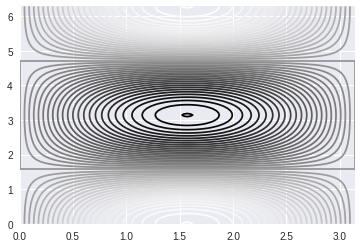

In [0]:
import scipy.special as sf
theta, phi = np.mgrid[0:math.pi:101j, 0:2*math.pi:101j]
plt.contour(theta, phi, np.real(sf.sph_harm(1, 1, phi, theta)), 50)

In [0]:
import scipy.integrate as ig
xlow = 0
xhigh = math.pi
ylow = lambda x: math.pi/2.0
yhigh = lambda x : math.pi*3.0/2.0
fsph = lambda phi,theta: np.real(sf.sph_harm(1,1,phi,theta)) * np.sin(theta)
print(ig.dblquad(fsph, xlow, xhigh, ylow, yhigh))

(1.0854018818374016, 1.2050381601873567e-14)


##Solving 1st order Ordinary Differential Equations (ODEs)

Find the function $y(t)$ that satisfies the ODE $ y'(t) = f(t, y) $ with initial conditions $y(0) = y_0$ and $y'(0) = v_0$.

Remember the derivative with a finite $h$:
$$ y'(t) = \frac{\big( y(t+h) - y(t) \big)}{h} $$
So,
$$ y(t+h) = y(t) + h f(t, y) $$
or in discrete steps
$$ y_{n+1} = y_n + h f(t, y_n) $$


###Forward Euler method

In [0]:
def solve_forward_euler(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        y[i+1] = y[i] + f(y[i], t[i]) * (t[i+1] - t[i])
    return y

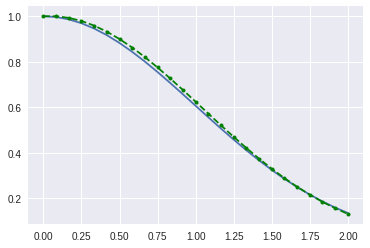

In [0]:
f1 = lambda y, t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0, 2, 25)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_solution = solve_forward_euler(f1, t, y0)
plt.plot(t, y1_solution, "--og", ms = 4)

The truncation error in Euler's method is due to the ignored second order term:
$$ E_{step} = \frac{1}{2} y''(t) h^2 = \mathcal{O}(h^2) $$
After $n$ integration steps this error has accumulated to
$$ E_{accum} = n E_{step} = \frac{t_n - t_0}{h} E_{step} = \mathcal{O}(h) $$

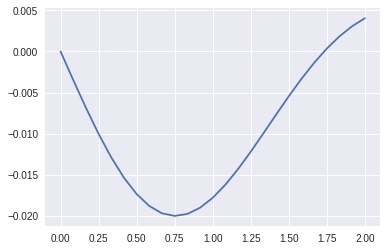

In [0]:
plt.plot(t, f1_exsol(t) - y1_solution)

###Not bad for a few minutes of coding. Is there anything wrong with it?

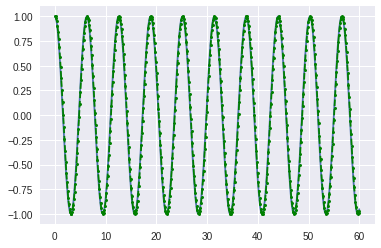

In [0]:
f2 = lambda y, t: -np.sin(t)
f2_exact = lambda t: np.cos(t)
y0 = 1
t = np.linspace(0,60,480)
plt.plot(t, f2_exact(t))
Y2solution = solve_forward_euler(f2, t, y0)
plt.plot(t, Y2solution, '--og', ms = 3)

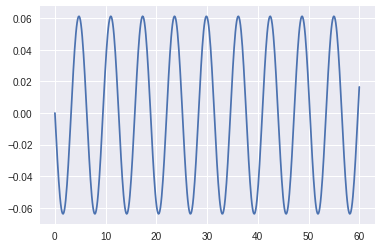

In [0]:
plt.plot(t, f2_exact(t) - Y2solution)

###The mid-point method

Instead of the derivative expression that gave us the Euler method, i.e.
$$ y'(t) = \frac{y(t+h) - y(t)}{h} $$
we can realized that this gives the derivative at $t + \frac{h}{2}$
$$ y'\big(t + \frac{h}{2}\big) = \frac{y(t+h) - y(t)}{h} $$

Then we find
$$ y'\big(t+\frac{h}{2}\big) = f\big(t+\frac{h}{2}, y(t+\frac{h}{2})\big) $$
and we can use the Taylor expansion for $y(t+\frac{h}{2}) = y(t) + \frac{h}{2} y'(t)$ to find
$$ y'\big(t+\frac{h}{2}\big) = f\big(t+\frac{h}{2},  y(t) + \frac{h}{2} f(t, y(t)\big) $$
so that
$$ y(t+h) = y(t) + h f\big(t+\frac{h}{2},  y(t) + \frac{h}{2} f(t, y(t)\big) $$

In discrete steps of $\frac{h}{2}$ this becomes
$$ y_{n+1} = y_n + h f\big(t+\frac{h}{2}, y_n + \frac{h}{2} f(t, y_n)\big) $$

In [0]:
def solve_forward_midpoint(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = (t[i+1] - t[i])
        y[i+1] = y[i] + h * f(y[i] + h/2 * f(y[i], t[i]), t[i] + h/2)
    return y

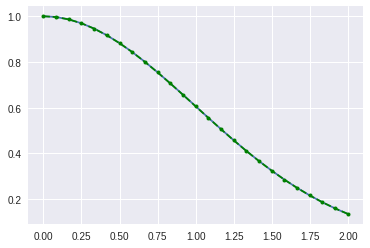

In [0]:
f1 = lambda y, t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0, 2, 25)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_solution = solve_forward_midpoint(f1, t, y0)
plt.plot(t, y1_solution, "--og", ms = 4)

Since the midpoint method is symmetric in time around the $t + \frac{h}{2}$ point, the error cannot be even in $h$. This means that the error must be of third order in $h$:
$$ E_{step} \propto h^3 = \mathcal{O}(h^3) $$
After $n$ integration steps this error has accumulated to
$$ E_{accum} = n E_{step} = \frac{t_n - t_0}{h} E_{step} = \mathcal{O}(h^2) $$

The midpoint method will therefore be more accurate than Newton's method.

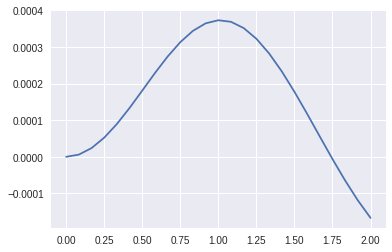

In [0]:
plt.plot(t, f1_exsol(t) - y1_solution)

###4th order Runge-Kutta

In [0]:
def solve_rk4(f,t,y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0,len(t)-1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i],t[i])
        k2 = h*f(y[i] + k1/2.0, t[i] + h/2.0)
        k3 = h*f(y[i] + k2/2.0, t[i] + h/2.0)
        k4 = h*f(y[i] + k3, t[i] + h)
        y[i+1] = y[i] + 1.0/6.0 * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [0]:
y0 = 1
t = np.linspace(0,60,120)
plt.plot(t, f2_exact(t))
Y2solution = solve_rk4(f2,t,y0)
plt.plot(t, Y2solution, '--og', ms = 3)

In [0]:
plt.plot(t, f2_exact(t) - Y2solution)

In [0]:
import scipy.integrate as ig

In [0]:
#### hermite function with n=2
def fh2(y,t,n=2):
    yprime=np.zeros_like(y)
    yprime[0]=y[1]
    yprime[1]=2*t*y[1] - 2*n*y[0]

In [0]:
y0=[-2,0]